# Describe

Our group received two files, one is about the user information (userID, gender, age, health condition, etc), and another one is history record of users (mainly entertainment data) from January 2018 until November 2021.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

##  Read file

#Read
df2018=pd.read_csv("CCDate2018-2021.csv") 
df_CustomerMedicalConditions=pd.read_csv("CustomerMedicalConditions04Nov21.csv")

#Rename column
df2018=df2018.rename(columns={"ExternalID": "External ID"}) 
df2018=df2018.rename(columns={"Link  Type": "Link Type"}) 

### General type of these data
- The general type of these data is `tabular`

### Links between this data and other data
- The `ExternalID` in the CCDate2018-2021 table is the `foreign key` (also the primary key in the CustomerMedicalConditions)

### Sturcture of these two dataframes

In [3]:
print("\033[1m" + "Structure of CCDate2018-2021.csv:" + "\033[0m")

# how large and complex is it (rows/columns, size, variation, structure)
print("\033[1m" + "rows=" + "\033[0m",df2018.shape[0])
print("\033[1m" + "columns=" + "\033[0m",len(df2018.columns))
print("\033[1m" + "columns name=" + "\033[0m",list(df2018.columns))
print("\033[1m" + "size=" + "\033[0m",df2018.size)
df2018.head()

Structure of CCDate2018-2021.csv:
rows= 654915
columns= 9
columns name= ['Time', 'VisitorID', 'External ID', 'Role', 'Location', 'Link Title', 'Link Type', 'ContentInfo', 'URL']
size= 5894235


,Time,VisitorID,External ID,Role,Location,Link Title,Link Type,ContentInfo,URL
0,11/1/21 5:10 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Comfort Break,Services,-1|329|10|Comfort Break|1|,LIST
1,11/1/21 5:10 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Ask For,Category,NaN,NaN
2,11/1/21 5:08 PM,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care Team,Category,NaN,NaN
3,11/1/21 5:08 PM,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care,Category,NaN,NaN
4,11/1/21 5:07 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Family & Friends,Internet,NaN,contacts.asp


In [4]:
print("\033[1m" + "Structure of CustomerMedicalConditions04Nov21.csv:" + "\033[0m")

# how large and complex is it (rows/columns, size, variation, structure)
print("\033[1m" + "rows=" + "\033[0m",df_CustomerMedicalConditions.shape[0])
print("\033[1m" + "columns=" + "\033[0m",len(df_CustomerMedicalConditions.columns))
print("\033[1m" + "columns name=" + "\033[0m",list(df_CustomerMedicalConditions.columns))
print("\033[1m" + "size=" + "\033[0m",df_CustomerMedicalConditions.size)
df_CustomerMedicalConditions.head()

Structure of CustomerMedicalConditions04Nov21.csv:
rows= 1311
columns= 7
columns name= ['External ID', 'CleverCogsUserId', 'Gender', 'DateOfBirth', 'Age', 'StaffPlanConditions', 'CareSysCondition']
size= 9177


,External ID,CleverCogsUserId,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
1,4704,772,F,1940/6/21,81.0,NaN,COPD
2,4706,1128,F,1931/2/25,90.0,NaN,Dementia
3,4707,1159,F,1982/9/18,39.0,NaN,Brain Injury
4,4708,784,F,1931/12/20,90.0,NaN,NaN


### Levels for categorical values

In [5]:
print("Categorical values in","\033[1m" + "Gender" + "\033[0m",":",df_CustomerMedicalConditions["Gender"].unique())
print("Categorical values in","\033[1m" + "Role" + "\033[0m",":",df2018["Role"].unique())
print("Categorical values in","\033[1m" + "Link Titile" + "\033[0m",":",df2018["Link Title"].unique())
print("Categorical values in","\033[1m" + "Link Type" + "\033[0m",":",df2018["Link Type"].unique())
print("Categorical values in","\033[1m" + "Location" + "\033[0m",":",df2018["Location"].unique())
df_CustomerMedicalConditions3=pd.read_csv("CustomerMedicalConditions04Nov21.csv")
df_CustomerMedicalConditions3=df_CustomerMedicalConditions3.dropna(subset=["CareSysCondition"])
print("Categorical values in","\033[1m" + "CareSysCondition" + "\033[0m",":",df_CustomerMedicalConditions3["CareSysCondition"].unique())
df_CustomerMedicalConditions1=pd.read_csv("CustomerMedicalConditions04Nov21.csv")
df_CustomerMedicalConditions1=df_CustomerMedicalConditions1.dropna(subset=["StaffPlanConditions"])
df_CustomerMedicalConditions1['StaffPlanConditions']=df_CustomerMedicalConditions1['StaffPlanConditions'].str.rstrip()
print("Categorical values in","\033[1m" + "StaffPlanConditions" + "\033[0m",":",df_CustomerMedicalConditions1["StaffPlanConditions"].unique())

Categorical values in Gender : ['F' 'M' 'U']
Categorical values in Role : ['User' 'Support' 'Employee' nan 'Visitor']
Categorical values in Link Titile : ['Comfort Break' 'Ask For' 'My Care Team' ...
 'Frank Sinatra Christmas Music' '80s Country'
 'Broom Court Christmas Menu']
Categorical values in Link Type : ['Services' 'Category' 'Internet' 'Radio' 'Gallery' 'Standard page'
 'HTML page' 'TV' 'MP3 player' 'Phone']
Categorical values in Location : ['Broom Court' '67 Glamis Road' 'Belses Gardens' 'Aberdeen C@H'
 'St Leonards Court' 'Edinburgh North Lindsay Road C@H' 'Menzieshill C@H'
 '69 Glamis Road' '71 Glamis Road' 'Charleston C@H' 'North Housing'
 'Broom Care Home' 'Raeden Court' 'Edinburgh Central Roseburn C@H'
 'Ardler & St Marys C@H' 'Responder Service' 'Edinburgh East Abbey C@H'
 'West Housing' 'Edinburgh Central Coxfield C@H' 'Glasgow West C@H'
 'Douglas & B/Ferry C@H' nan 'Edinburgh West LFC C@H ' 'Forth Valley C@H'
 'Edinburgh East St Leonards C@H ' 'National' 'South Ayrshir

- `Link Type` is the kind of path people have take and a higher level group to `Link title`.
- `CareSysCondition` is a general medical condition and `StaffPlanConditions` is a subconditon (to help staffs have a better understading of users to provide a better service)

## Clean

After look through all data, I found some strange data in them and decided to remove them. Also, I decided to link these two file on a common variable "Link Type" to make these data more readable and more convinient to process.

- **Delete rows with people whose age under 18 and over 120:** 

Blackwood doesn't offer any services to under 18s, and there are several people whose age is 121, but the oldest human in the world just lived to 122 and no person breaks her [record](https://www.vox.com/science-and-health/2016/10/5/13176068/longevity-study-ceiling-old-age-limit). So I think these data are strange so I remove these rows.  
- **Delete rows with people who don't have date of birth:** 

Our data owner said ones without DOB are probably shared machines and we remove these data.
- **Delete rows with null External ID:** 

NULL ID's means its a machine that is shared in a communal space in a care home and not a personal usage, so I exclude all of these. Also without External ID I can not link the history record with user information, so can not get a valuable analysis from it. 
- **Combine rows with duplicate values in the External ID:** 

One person has multiple StaffPlanConditions and his StaffPlan conditions have been separated into different rows with the same `EXTERNAL ID`. I combine them in one row cuz all those conditions will relate to that individual.
- **Merge two dataframes (CustomerMedicalConditions04Nov21.xlsx and CCDate2018-2021.xlsx) provided by data owner:** 

It will help me to read the user information in history record table. Also, Column `External ID` can be found in both DataFrames, so I use it to link these two tables.

In [6]:
##  Clean data
#remove wrong age data 
df_CustomerMedicalConditions = df_CustomerMedicalConditions.loc[(df_CustomerMedicalConditions['Age'] <120)&(df_CustomerMedicalConditions['Age'] >= 18)] 

#Delete rows with null DOB and rows with null External ID in CustomerMedicalConditions04Nov21.csv
df_CustomerMedicalConditions = df_CustomerMedicalConditions.dropna(axis=0, subset=["DateOfBirth"]).dropna(axis=0, subset=["External ID"]) 

#Delete rows with null External ID in CCDate2018-2021.csv
df2018 = df2018.dropna(axis=0, subset=["External ID"]) 

#Merge nearly duplicate rows based on same External ID （combine multiple StaffPlanConditions of one person in one row)
df_CustomerMedicalConditions['StaffPlanConditions'] = df_CustomerMedicalConditions['StaffPlanConditions'].replace(np.nan, "").str.rstrip()
df_CustomerMedicalConditions = df_CustomerMedicalConditions.groupby(["External ID","CleverCogsUserId","Gender","DateOfBirth","Age","CareSysCondition"])["StaffPlanConditions"].apply(', '.join).reset_index()
    
##  Merge dataframe
df = pd.merge(df2018, df_CustomerMedicalConditions, how='left',on=['External ID'])

#output a new dataframe
df.to_csv('result.csv', index=False)  

In [7]:
df.head()

,Time,VisitorID,External ID,Role,Location,Link Title,Link Type,ContentInfo,URL,CleverCogsUserId,Gender,DateOfBirth,Age,CareSysCondition,StaffPlanConditions
0,11/1/21 5:10 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Comfort Break,Services,-1|329|10|Comfort Break|1|,LIST,NaN,NaN,NaN,NaN,NaN,NaN
1,11/1/21 5:10 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Ask For,Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/1/21 5:08 PM,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care Team,Category,NaN,NaN,4859.0,M,1963/5/26,58.0,Cancer,
3,11/1/21 5:08 PM,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care,Category,NaN,NaN,4859.0,M,1963/5/26,58.0,Cancer,
4,11/1/21 5:07 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Family & Friends,Internet,NaN,contacts.asp,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("\033[1m" + "rows=" + "\033[0m",df.shape[0])
print("\033[1m" + "columns=" + "\033[0m",len(df.columns))
print("\033[1m" + "columns name=" + "\033[0m",list(df.columns))
print("\033[1m" + "size=" + "\033[0m",df.size)

rows= 540837
columns= 15
columns name= ['Time', 'VisitorID', 'External ID', 'Role', 'Location', 'Link Title', 'Link Type', 'ContentInfo', 'URL', 'CleverCogsUserId', 'Gender', 'DateOfBirth', 'Age', 'CareSysCondition', 'StaffPlanConditions']
size= 8112555


### Summary statistics about the data

This record is from 1/1/18 12:20 AM to 11/1/21 5:10 PM
The number of valid users is 881 (male: 368 female: 493 )
Age is from 20.0 to 109.0 (average: 71.9738933030647 standard deviation: 19.71612167819807 )


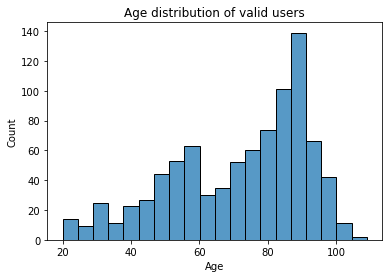

In [9]:
#Time
print("\033[1m" + "This record is from" + "\033[0m",df2018["Time"].iloc[-1],"\033[1m" + "to" + "\033[0m",df2018["Time"].iloc[0])

#The number of valid users
print("\033[1m" + "The number of valid users is" + "\033[0m",df_CustomerMedicalConditions["External ID"].count(),"(male:",df_CustomerMedicalConditions["Gender"].value_counts().M,"female:",df_CustomerMedicalConditions["Gender"].value_counts().F,")")

#Age distribution
print("\033[1m" + "Age is from" + "\033[0m",df_CustomerMedicalConditions["Age"].min(),"\033[1m" + "to" + "\033[0m",df_CustomerMedicalConditions["Age"].max(),"(average:",df_CustomerMedicalConditions["Age"].mean(),"standard deviation:",df_CustomerMedicalConditions["Age"].std(),")")

sns.histplot(df_CustomerMedicalConditions["Age"],bins=20)
plt.title("Age distribution of valid users")
plt.show()

#plt.xticks(r + width/2,['2018','2019','2020','2021'])


### How does the data relate to the questions that the data owner has discussed with you?

Our group decided to focus on "others like me" (like a Recommender system which can predict the "rating" or "preference" a user would give to an entertainment activity or a service based on their physical conditions)

# Explore

I am mainly responsible for the variable "Link Type". 

"Link Type" is the kind of path people have taken and a higher level group to Link title. For example, "Service" means a person is asking for help (comfort break or pick something up), and category is to other kinds of services (care assistance).

### The frequency of value in Link type

In [10]:
##Plot

#count value 
colors_list = ['#ABEBC6','#82E0AA','#DAF7A6',"#FFC300","#FF5733","#C70039"]
colors_list1=["#DCE775","#FFF176","#FFD54F","#FFB74D","#FF8A65","#FFEE58"]
df_barchart=df['Link Type'].value_counts().to_frame()
df_barchart.head(10)

,Link Type
Internet,258709
Category,252868
HTML page,15774
Radio,10764
Services,2101
Gallery,276
Standard page,263
TV,72
MP3 player,9
Phone,1


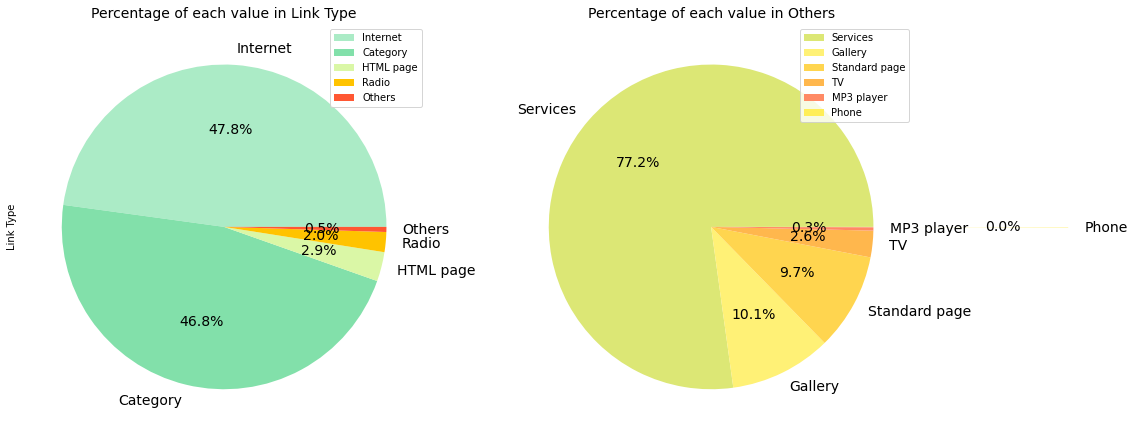

In [61]:
#define others
others = df_barchart.loc['Services'] + df_barchart.loc['Gallery'] + df_barchart.loc['Standard page'] + df_barchart.loc['TV'] + df_barchart.loc['MP3 player'] + df_barchart.loc['Phone']
others.name = 'Others'
df_barchart_others=df_barchart.append(others).copy(deep=True).drop(['Services','Gallery',"Standard page","TV","MP3 player","Phone"], axis='index')


plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(1,2,1, aspect='equal')
df_barchart_others.plot(kind='pie', y='Link Type',ax=ax1, autopct='%1.1f%%', shadow=False, legend = True, fontsize=14,colors=colors_list)
plt.title('Percentage of each value in Link Type',fontsize=14)

# plot chart of "others"
ax2 = plt.subplot(1,2,2,aspect='equal')
plt.axis('off')
explode = (0,0,0,0,0,1.2)
plt.title('Percentage of each value in Others',fontsize=14)

df_others.plot(kind='pie', y='Link Type',ax=ax2, autopct='%1.1f%%', shadow=False, legend = True, fontsize=14,colors=colors_list1,explode=explode)

plt.show()


**Explanation**
- The frequency of values in "Link Type column: Internet>=Category>>HTML page>Radio>>Service>Gallery>Standard page>TV>MP3 player>>Phone

**Hypothesis**

- The users of Clevercogs rarely use their phones in daily life, because they are always accompanied by other people or rarely own mobile phones. But I still need to ask the data owner to confirm my hypothesis.

### Relationship between "Link Type" and "Age"

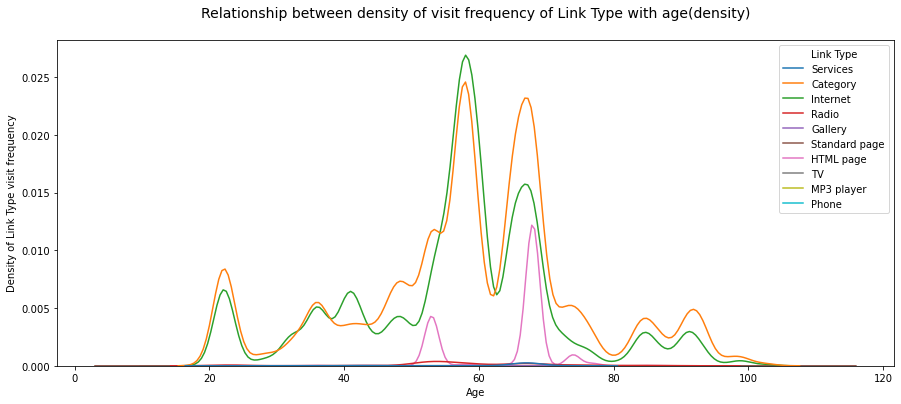

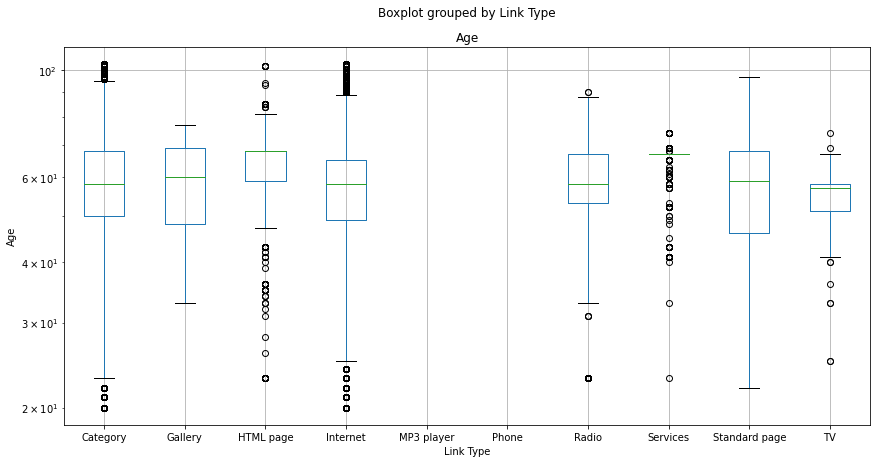

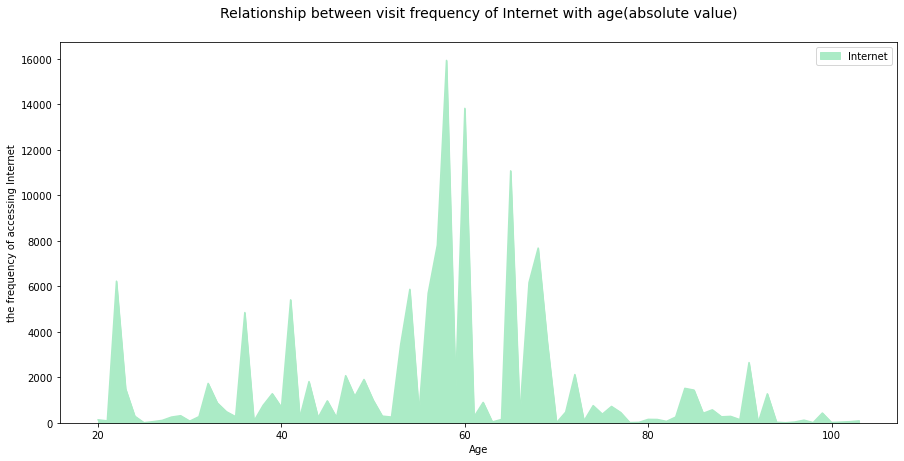

In [54]:
#sort
df_Category=df[(df == 'Category').any(axis=1)]#select rows with value "Category"
# print(df_Category['Link Title'].value_counts())

df_Internet=df[(df == 'Internet').any(axis=1)]#select rows with value "Internet"
df_HTML_page=df[(df == 'HTML page').any(axis=1)]
df_Radio=df[(df == 'Radio').any(axis=1)]
df_Services=df[(df == 'Services').any(axis=1)]
df_Gallery=df[(df == 'Gallery').any(axis=1)]
df_Standard_page=df[(df == 'Standard page').any(axis=1)]
df_TV=df[(df == 'TV').any(axis=1)]
df_MP3_player=df[(df == 'MP3 player').any(axis=1)]
df.loc[df['Link Type']=='Phone']
df_Phone=df[(df == 'Phone').any(axis=1)]#select rows with value "Phone"
import warnings
warnings.filterwarnings('ignore')

## Create dataframe with Age and Link Type columns

plt.figure(figsize=(15, 6))
df_Age_LinkType=df.filter(["Age","Link Type"], axis=1) 
sns.kdeplot(data=df_Age_LinkType, x="Age", hue="Link Type")
plt.ylabel('Density of Link Type visit frequency')
plt.title('Relationship between density of visit frequency of Link Type with age(density)',fontsize=14,y=1.05)

df_Age_LinkType.boxplot(column="Age",by="Link Type",figsize=(14,7)).set_yscale('log')
plt.ylabel('Age')
plt.show()
df_Age_LinkType.head()




## Create DataFrame (Age and visit frequency of Internet)

data={"Age": 18, "Link Type": [df_Internet.loc[df_Internet["Age"]==18]["Link Type"].count()]}
df_Internet_Age = pd.DataFrame(data)
for i in range(18, 119):
    item =pd.DataFrame({"Age": i, "Link Type": [df_Internet.loc[df_Internet["Age"]==i]["Link Type"].count()]}, index=[0])
    df_Internet_Age = df_Internet_Age.append(item , ignore_index=True)
df_Internet_Age=df_Internet_Age.loc[(df_Internet_Age["Link Type"]!=0)]
df_Internet_Age.head()

## plot chart

df_Internet_Age.plot(x="Age", y="Link Type",kind='area',figsize=(15,7),color='#ABEBC6') 
L=plt.legend()#Change legend label text
L.get_texts()[0].set_text('Internet')
plt.ylabel('the frequency of accessing Internet')
plt.title('Relationship between visit frequency of Internet with age(absolute value)',fontsize=14,y=1.05)
plt.show()

**Explanation**
- People aged 40 to 80 usually use CleverCogs. and may make up the vast majority of the user population. (In Figure 1, the density of frequency of accessing to Clevercogs is higher from 40 to 80 compared with other age groups)
- People in the 55 to 60 age group use Clevercogs most frequently. (In boxplot, the box are clustered around 58)
- People aged around 30 and 80 years rarely use Clevercogs. (In Figure 1, the density of frequency of accessing to Clevercogs around 30 and 80 is significantly lower compared with other age groups)
- The preference of Link Type of users in each age group are similar.(These density curves are similar)


**Hypothesis**

- People around 55 age may prefer "Internet" to "Category", while people around 65 may prefer "Category" to "Internet". Maybe younger people are more likely to spend time on entertainment ("Internet") on Clevercogs, while older people will spend more time on healthcare services ("Categories) because of their worse physical conditions. But I still need to ask the data owner or do some research to have a better understanding of what kind of service that "Internet" snd "Category" separately included.

### Relationship between "Link Type" and "Gender"

In [55]:
## Create dataframe with Gender and Link Type columns

df_Gender_LinkType=df.filter(["Gender","Link Type"], axis=1) 
df_Gender_LinkType = df_Gender_LinkType.dropna(axis=0, subset=["Gender"]) 

df_Female=df_Gender_LinkType.loc[df_Gender_LinkType["Gender"]=="F"]
item1= df_Female.value_counts()
df_Male=df_Gender_LinkType.loc[df_Gender_LinkType["Gender"]=="M"]
item2= df_Male.value_counts()
df_Unknown=df_Gender_LinkType.loc[df_Gender_LinkType["Gender"]=="U"]
item3= df_Unknown.value_counts()

## Convert "value_counts" output to dataframe

#name series
Female = pd.Series(item1).rename("Female")
Male = pd.Series(item2).rename("Male")
Unknown = pd.Series(item3).rename("Unknown")

#merge series
data = {"Link Type": ['Category', 'Internet', 'HTML page', 'Radio',"Standard page","Gallery","Services","TV","Phone","MP3 Player"]}
Emptydataframe = pd.DataFrame(data)
Emptydataframe.head()
Emptydataframe = Emptydataframe.merge(Female, how='outer',on="Link Type")
Emptydataframe = Emptydataframe.merge(Male, how='outer',on="Link Type")
df_Gender = Emptydataframe.merge(Unknown, how='outer',on="Link Type")
df_Gender.head(10)



,Link Type,Female,Male,Unknown
0,Category,86634.0,75381.0,853.0
1,Internet,61734.0,73234.0,572.0
2,HTML page,11401.0,3872.0,3.0
3,Radio,394.0,1712.0,2.0
4,Standard page,80.0,84.0,NaN
5,Gallery,76.0,33.0,1.0
6,Services,73.0,480.0,3.0
7,TV,8.0,35.0,2.0
8,Phone,NaN,NaN,NaN
9,MP3 Player,NaN,NaN,NaN


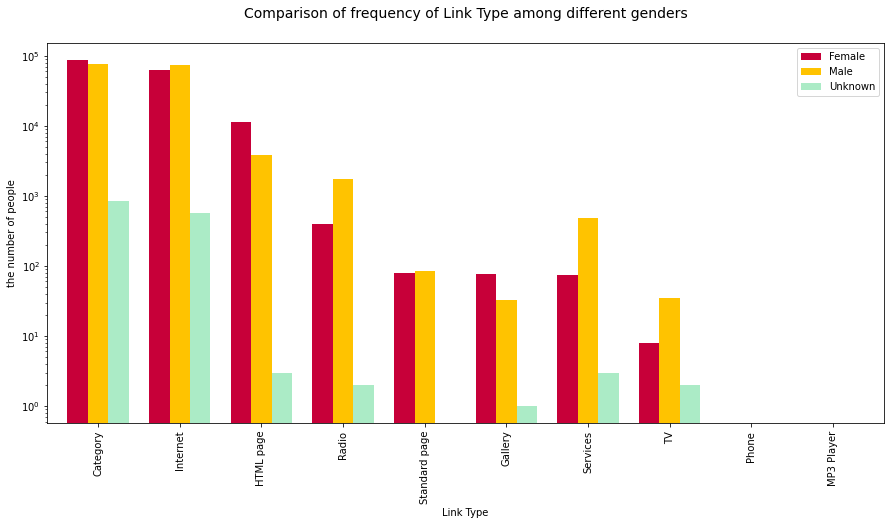

In [56]:
## Plot chart
colors_list = ["#C70039","#FFC300",'#ABEBC6']
df_Gender.set_index('Link Type').plot.bar(figsize=(15,7),color = colors_list,width=0.75).set_yscale('log')
plt.ylabel('the number of people')
plt.title('Comparison of frequency of Link Type among different genders',fontsize=14,y=1.05)
plt.show()

**Explanation**
- No significant gender differences can be seen on the bar chart. 
- For "HTML page" and "Gallery", there are more females than males. While for "Radio" "Service" and "TV", there are more males than females. For the rest "Link Type", the number of females and males are nearly the same.
- No one who didn't provide gender information has access to standard pages (there are no data of people who didn't provide gender information on "Standard page").

**Hypothesis**
- Both males and females have nearly similar preferences of Link Type (Bars of the male is almost as high as bars of female). But males are more likely to prefer "Rdio", "Service", "TV" compared with females, while females prefer "HTML page" and "Gallery". But I still need more samples to analyse and maybe need to use significance test to compare the difference between males and females.

### Relationship between "Link Type" and healthcondition

In [57]:
## Create dataframe with CareSysCondition and Link Type columns

df_CareSysCondition_LinkType=df.filter(["CareSysCondition","Link Type"], axis=1) 
df_CareSysCondition_LinkType = df_CareSysCondition_LinkType.dropna(axis=0, subset=["CareSysCondition"]) 

df_CareSysCondition_LinkType.head()

data = {"Link Type": ['Category', 'Internet', 'HTML page', 'Radio',"Standard page","Gallery","Services","TV","Phone","MP3 Player"]}
Emptydataframe1 = pd.DataFrame(data)

for item in df_CareSysCondition_LinkType["CareSysCondition"].unique():
    df_item=df_CareSysCondition_LinkType.loc[df_CareSysCondition_LinkType["CareSysCondition"]==item]
    item1= df_item.value_counts()
    item = pd.Series(item1).rename(item)
    Emptydataframe1 = Emptydataframe1.merge(item, how='outer',on="Link Type")
Emptydataframe1=Emptydataframe1.set_index("Link Type")
Emptydataframe1.head(10)


,Cancer,Elderly Care/Support,Brain Injury,Epilepsy,Cerebral Palsy,Learning Difficulties,Arthritis,Addiction Issues,Stroke,Mental Health Issues,...,Huntington's,Bi Polar Disorder,Amputee,Asthma,Visual Impairment,Diabetes,Spinal Injury,Parkinsons,COPD,OCD
Link Type,,,,,,,,,,,,,,,,,,,,,
Category,1409.0,25584.0,8046.0,14584.0,35024.0,13818.0,15502.0,1003.0,5849.0,11896.0,...,173.0,927.0,1217.0,1244.0,656.0,749.0,171.0,294.0,1400.0,40.0
Internet,889.0,13327.0,6126.0,17262.0,36962.0,9497.0,11680.0,1368.0,5764.0,9126.0,...,156.0,728.0,767.0,751.0,400.0,454.0,112.0,109.0,850.0,2.0
HTML page,1.0,10286.0,63.0,23.0,1057.0,54.0,7.0,NaN,16.0,66.0,...,3.0,5.0,10.0,3.0,5.0,3.0,NaN,NaN,20.0,NaN
Radio,NaN,91.0,23.0,323.0,766.0,197.0,22.0,NaN,NaN,7.0,...,NaN,2.0,3.0,3.0,NaN,64.0,NaN,NaN,3.0,NaN
Standard page,2.0,14.0,6.0,5.0,53.0,14.0,9.0,8.0,2.0,20.0,...,NaN,NaN,2.0,2.0,2.0,6.0,NaN,1.0,3.0,NaN
Gallery,NaN,NaN,5.0,NaN,44.0,NaN,24.0,NaN,NaN,10.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Services,NaN,1.0,10.0,5.0,447.0,4.0,32.0,NaN,1.0,4.0,...,11.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN
TV,NaN,NaN,8.0,17.0,6.0,1.0,NaN,NaN,1.0,NaN,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
Phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


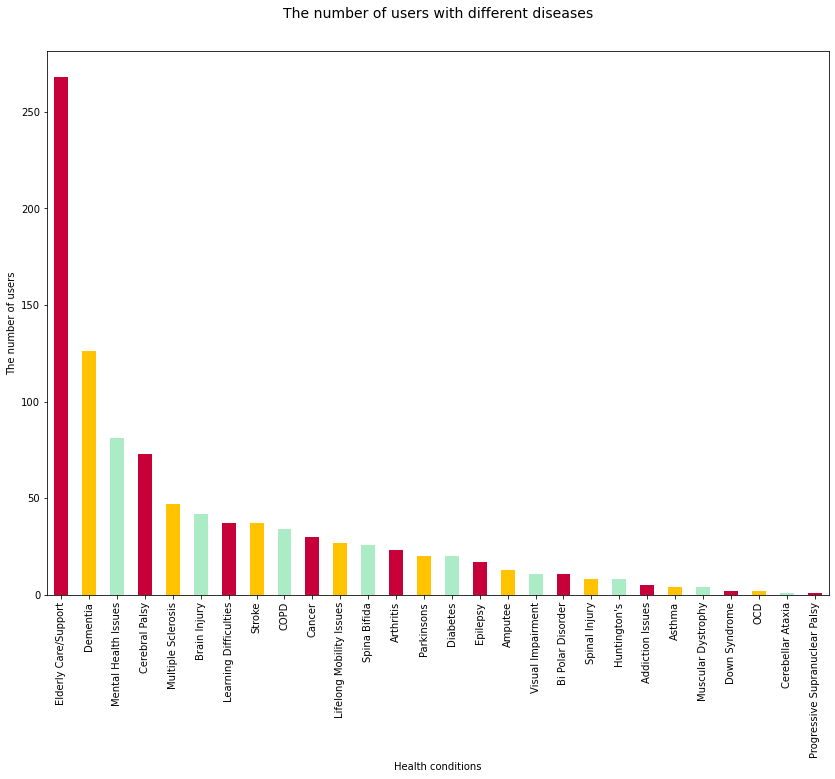

In [58]:
df_CustomerMedicalConditions3["CareSysCondition"].value_counts().plot.bar(figsize=(14, 10),color = colors_list)

plt.ylabel('The number of users')
plt.xlabel('Health conditions')
plt.title('The number of users with different diseases',fontsize=14,y=1.05)

plt.show()

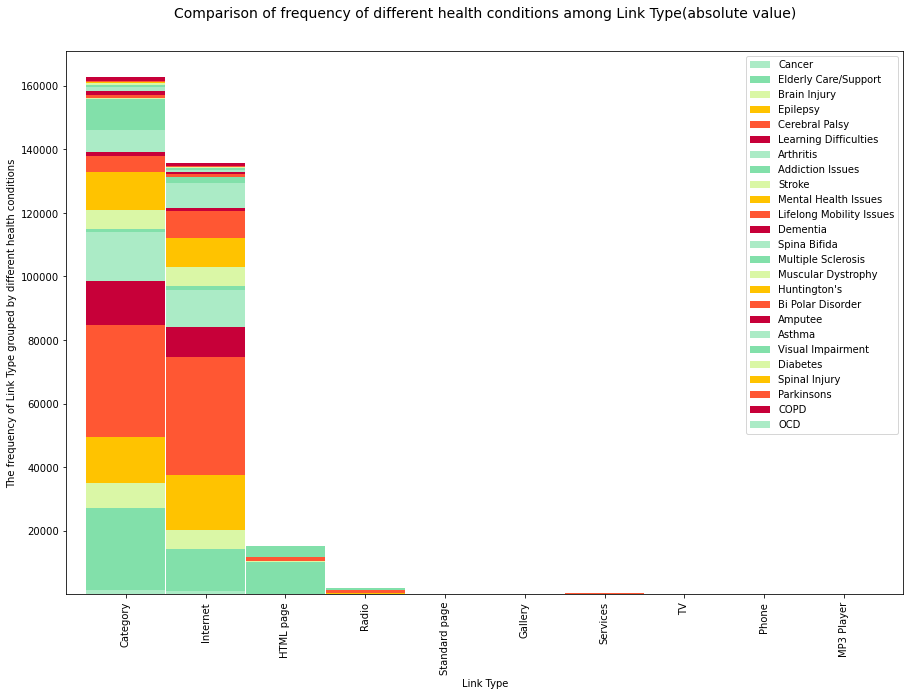

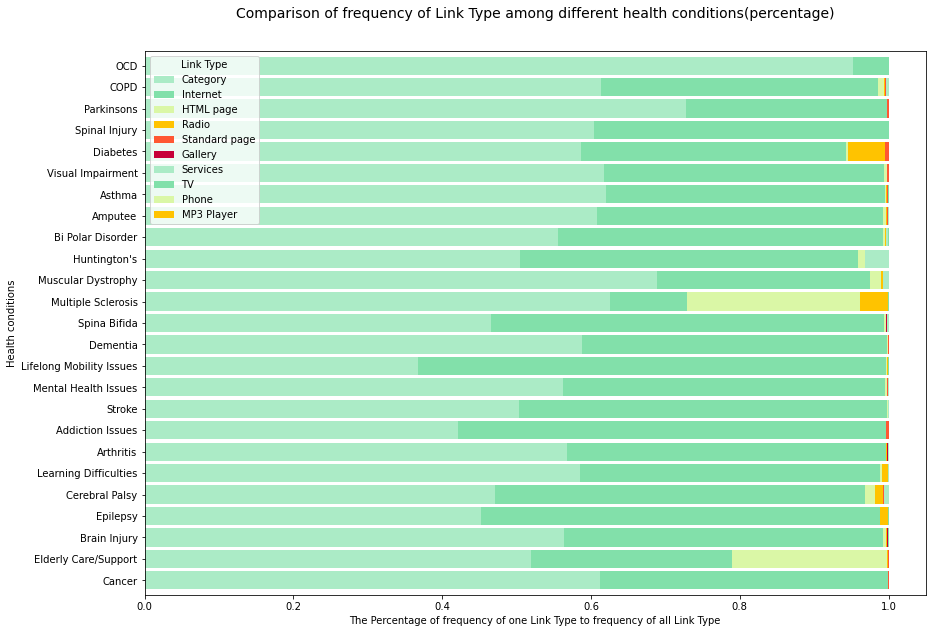

In [59]:
## Plot chart with absolute value

colors_list = ['#ABEBC6','#82E0AA','#DAF7A6',"#FFC300","#FF5733","#C70039"]
Emptydataframe1.plot.bar(stacked=True,figsize=(15, 10),color = colors_list,width=0.99)
plt.ylabel('The frequency of Link Type grouped by different health conditions')
plt.title('Comparison of frequency of different health conditions among Link Type(absolute value)',fontsize=14,y=1.05)
plt.show()

## Plot percent bar chart

# From raw value to percentage
Emptydataframe2=Emptydataframe1.copy(deep=True)
for item in df_CareSysCondition_LinkType["CareSysCondition"].unique():
    Emptydataframe2[item] = Emptydataframe2[item].div(Emptydataframe2[item].sum(), axis=0)

Emptydataframe2=Emptydataframe2.transpose()
Emptydataframe2.head()

# Plot chart
colors_list = ['#ABEBC6','#82E0AA','#DAF7A6',"#FFC300","#FF5733","#C70039"]
Emptydataframe2.plot.barh(stacked=True,figsize=(14, 10),color = colors_list,width=0.85,rot=0)
plt.ylabel('Health conditions')
plt.xlabel('The Percentage of frequency of one Link Type to frequency of all Link Type')

plt.title('Comparison of frequency of Link Type among different health conditions(percentage)',fontsize=14,y=1.05)
plt.show()



**Explanation**
- Nearly half of users need Early care/support.(In figure one, "Early care/support" is the highest bar, and almost twice as much as the second one "Diabetes".)
- Most of the patients like to have access to "Category" and "Internet".(In figure2, the columns of "Category" and "Internet" are highest)
- People with cerebral palsy use Clevercogs most frequently.(In figure 1, they are not the largest group, but in figure 2, they account for a large proportion of the frequency of Link Type)
- The Linke Type that most OCD patients had access to is OCD.(In figure3,  "Category" bar take up most of "Link Type" bar).

**Hypothesis**

- People with muscular problems reduced mobility are more likely to have access to "HTML page" compared with other link types: from figure3, in these people groups(for example, Multiple Scierosis or Elderly Care), "HTML page" bar takes up much more of  "Link Type" bar compared to other groups. But I still need more samples to confirm my hypothesis, and do some research or ask the data owner to find common symptoms among these diseases. And now the statistic data calculated by myself is not enough to support my hypothesis, I need to learn some advanced algorithms and statistic knowledge to figure out the accurate correlation between disease and Link Type (for example, maybe some simple machine learning I think).

# Reflect

### Reflection

When I had a first glance at these data, I had a really mixed feeling- I felt excited because this assignment is a good opportunity to challenge myself and I got a chance to apply what I learned in class and notebook to real-world practice. But more, I felt shocked and worried. These two files are so large and I have never seen so much data in one Excel (nearly 654916 rows!). Also, these data are really different from what we learned in class. In class, all of the types of data given are numbers, while in this assignment, most of them are strings (for example, the User ID or Timestamp), which means that I need to learn something else a lot by myself. I was even not sure whether I could finish it before DDL. 

But fortunately, everything goes not that bad, even though no one in our group comes from computer backgrounds. But all of them are warm-heart and are willing to share some cool python tricks in our group chat and the latest information they get from tutors or the data owner (that really helped me a lot).Also I learned a lot from this assignment, for example, when dealing with a dataframe involving lots of strings, I can assign value to those strings or use `value_counts`to count the frequency of string so that I can do some calculation with that.

I still have a lot of python skills need to learn, for example, how to add annotations or adjust parameters on plots to make them more perfect,more statistical and probabilistic knowledge to support my analysis results (not just judge the data from seeing plots) and how to analyse data by multiple variables (not just the relationships between two variables).

